<a href="https://colab.research.google.com/github/robinkm0610/NLP_Projects/blob/main/Ecommerce_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conduct sentiment analysis and identify what makes a product so good or bad by identifying its keywords. Analyses involved : sentiments, text cleansing, regex, word count



Using ecommerce clothing reviews to conduct sentiment analysis and identify what makes a product so good or bad from its keywords. NLP libraries tested : HuggingFace-KeyBert, SpaCy

**Objective**
Conduct sentiment analysis and identify what makes a product soo good or bad by identifying its keywords.

**Data Source**
https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install datasets transformers huggingface_hub
!apt-get install git-lfs
!pip install gspread-dataframe==3.2.1
!pip install keybert

/bin/bash: line 1: {sys.executable}: command not found
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from google.colab import drive, files
files.upload()

import torch
torch.cuda.is_available()

from transformers import pipeline

Saving kaggle.json to kaggle (1).json


In [8]:
pip install opendatasets

In [9]:
import opendatasets as od

In [11]:
dataset = od.download(
    "https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews/data")

Skipping, found downloaded files in "./womens-ecommerce-clothing-reviews" (use force=True to force download)


In [14]:
df = pd.read_csv('/content/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

In [15]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
df.describe(include = 'all')

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486.000000,23486.000000,23486.000000,19676,22641,23486.000000,23486.000000,23486.000000,23472,23472,23472
unique,NaN,NaN,NaN,13993,22634,NaN,NaN,NaN,3,6,20
top,NaN,NaN,NaN,Love it!,Perfect fit and i've gotten so many compliment...,NaN,NaN,NaN,General,Tops,Dresses
freq,NaN,NaN,NaN,136,3,NaN,NaN,NaN,13850,10468,6319
mean,11742.500000,918.118709,43.198544,NaN,NaN,4.196032,0.822362,2.535936,NaN,NaN,NaN
std,6779.968547,203.298980,12.279544,NaN,NaN,1.110031,0.382216,5.702202,NaN,NaN,NaN
min,0.000000,0.000000,18.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,5871.250000,861.000000,34.000000,NaN,NaN,4.000000,1.000000,0.000000,NaN,NaN,NaN
50%,11742.500000,936.000000,41.000000,NaN,NaN,5.000000,1.000000,1.000000,NaN,NaN,NaN
75%,17613.750000,1078.000000,52.000000,NaN,NaN,5.000000,1.000000,3.000000,NaN,NaN,NaN



Preliminary observation and implication towards the analysis,

* Clothing ID There are 23K reviews from 1,206 and item #1078 impresively has total frequency of 1,024 -> What this means, since clothing ID alone can count 4% of the data. We may expect some ID to have low review in contrast.
* Age seems clean with no particularly crazy age seen (max 99 and min 18)
* Review Text Interestingly, there are duplicated review seen (same coment with frequency of 3) -> We might need to check for the duplicates and see if this is from same item (which may do to technical glitch or simply user spamming to post same comments on different clothes)
* Rating People seem to ber very generous with rating with 25% percentile already at 4 -> So either most of these 1k product are all already good or the rating not necessarily representing the actual customer view towards the goods.
* Positive Feedback Count Only about half of the data has this value and it appears that few comments are highly useful than the other by seeing max count of 122.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [18]:
df[['Unnamed: 0','Clothing ID' ]] = df[['Unnamed: 0','Clothing ID' ]].astype(str)

In [19]:
df_review = df.copy()
df_review = df_review[df_review['Review Text'].notnull()]

In [20]:
df_review.shape

(22641, 11)

In [21]:
df_review.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [22]:
cond_1 = df_review['Review Text'].map(df_review['Review Text'].value_counts()) > 1


In [23]:
cond_2 = df_review['Positive Feedback Count'] == 0
df_review = df_review[~(cond_1 & cond_2)]

In [29]:
df_review = df_review.groupby(['Clothing ID','Review Text','Age', 'Rating','Recommended IND','Division Name','Department Name', 'Class Name'], dropna=False).agg({"Positive Feedback Count":np.sum}).reset_index()


In [30]:
df_review.head()


,Clothing ID,Review Text,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Positive Feedback Count
0,1,"I love this tank, it is so comfortable but it ...",24,2,0,Initmates,Intimate,Layering,1
1,1,Love this tank. material and fit are great. lo...,36,5,1,Initmates,Intimate,Layering,0
2,1,Originally i bought this in black and white. r...,50,5,1,Initmates,Intimate,Layering,0
3,10,This dress is comfortable and a great piece to...,38,4,1,Initmates,Intimate,Chemises,0
4,100,"Good design, comfortable fit. however, sizing ...",44,4,1,Initmates,Intimate,Intimates,3


In [31]:
df_review.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Clothing ID,22634,1178,1078,987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review Text,22634,22632,"Lightweight, soft cotton top and shorts. i thi...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,22634.0,NaN,NaN,NaN,43.28254,12.327671,18.0,34.0,41.0,52.0,99.0
Rating,22634.0,NaN,NaN,NaN,4.183441,1.115761,1.0,4.0,5.0,5.0,5.0
Recommended IND,22634.0,NaN,NaN,NaN,0.818857,0.385145,0.0,1.0,1.0,1.0,1.0
Division Name,22621,3,General,13362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department Name,22621,6,Tops,10046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class Name,22621,20,Dresses,6144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Positive Feedback Count,22634.0,NaN,NaN,NaN,2.631395,5.786988,0.0,0.0,1.0,3.0,122.0


Sentiment analysis

Keyword extraction : SpaCY


In [34]:
! pip install spacy
! pip install spacytextblob
! python -m textblob.download_corpora
! python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.5/636.5 kB 25.4 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.4 MB/s eta 0:00:00
✔ D

In [35]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [37]:
def get_sentiments(text_review):
  doc = nlp(text_review)
  sentiment = doc._.blob.polarity
  sentiment = round(sentiment, 2)
  label = 'positive' if sentiment > 0 else 'negative'
  positive_words = []
  negative_words = []
  adjective_words = []

  for word in doc._.blob.sentiment_assessments.assessments:
    if word[1] > 0:
      positive_words.append(word[0][0])
    elif word[1] < 0:
      negative_words.append(word[0][0])
    else:
      pass

  for token in doc:
    if token.pos == ("ADJ"):
      adjective_words.append(token)

  return label, sentiment, positive_words, negative_words, adjective_words

In [38]:
dftest = df_review.copy()


In [39]:
dftest.head()

,Clothing ID,Review Text,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Positive Feedback Count
0,1,"I love this tank, it is so comfortable but it ...",24,2,0,Initmates,Intimate,Layering,1
1,1,Love this tank. material and fit are great. lo...,36,5,1,Initmates,Intimate,Layering,0
2,1,Originally i bought this in black and white. r...,50,5,1,Initmates,Intimate,Layering,0
3,10,This dress is comfortable and a great piece to...,38,4,1,Initmates,Intimate,Chemises,0
4,100,"Good design, comfortable fit. however, sizing ...",44,4,1,Initmates,Intimate,Intimates,3


In [40]:
dftest['spacy_analysis'] = [get_sentiments(rev) for rev in dftest['Review Text']]
dftest['spacy_sentiment'] = [i[0] for i in dftest['spacy_analysis']]
dftest['spacy_score'] = [i[1] for i in dftest['spacy_analysis']]
dftest['spacy_pos'] = [i[2] for i in dftest['spacy_analysis']]
dftest['spacy_neg'] = [i[3] for i in dftest['spacy_analysis']]
dftest['spacy_adj'] = [i[4] for i in dftest['spacy_analysis']]

In [41]:
positive_rev = dftest['spacy_pos']
negative_rev = dftest['spacy_neg']

In [42]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

def create_wordclouds(text, title):
  stop_words = list(STOPWORDS)
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(text))
  plt.figure()
  plt.title(title)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

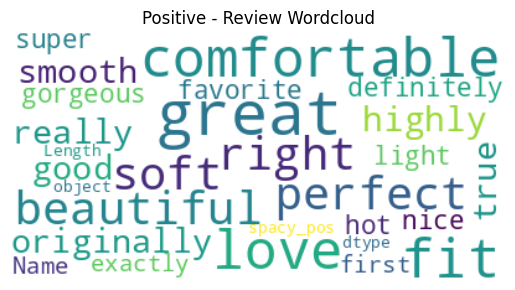

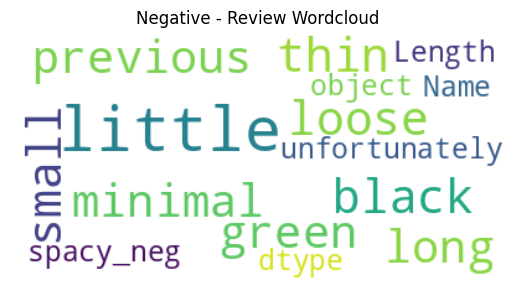

In [43]:
create_wordclouds(positive_rev, "Positive - Review Wordcloud")
create_wordclouds(negative_rev, "Negative - Review Wordcloud")